# Simple linear regression - Exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size.csv'. 

You are expected to create a simple linear regression (similar to the one in the lecture), using the new data. 

Apart from that, please:
-  Create a scatter plot (with or without a regression line)
-  Calculate the R-squared
-  Display the intercept and coefficient(s)
-  Using the model make a prediction about an apartment with size 750 sq.ft.

Note: In this exercise, the dependent variable is 'price', while the independent variable is 'size'.

Good luck!

## Import the relevant libraries

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
root_path='drive/My Drive/Colab Notebooks/'

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

## Load the data

In [14]:
new_data = pd.read_csv(root_path+'real_estate_price_size.csv')
new_data

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46
...,...,...
95,252460.400,549.80
96,310522.592,1037.44
97,383635.568,1504.75
98,225145.248,648.29


In [17]:
y = new_data['price']
x = new_data['size']


## Create the regression

### Declare the dependent and the independent variables

In [19]:
y.shape

(100,)

In [18]:
x.shape

(100,)

### Explore the data

### Transform the inputs into a matrix (2D object)

In [21]:
x_matrix = x.values.reshape(-1, 1)
x_matrix.shape

(100, 1)

### Regression itself

In [22]:
reg=LinearRegression()

reg.fit(x_matrix,y)

LinearRegression()

LinearRegression()

### Calculate the R-squared

In [23]:
reg.score(x_matrix,y)

0.7447391865847586

### Find the intercept

In [24]:
reg.intercept_

101912.60180122897

### Find the coefficients

In [25]:
reg.coef_

array([223.17874259])

### Making predictions

You find an apartment online with a size of 750 sq.ft.

All else equal what should be its price according to the model?

In [28]:
new_d = pd.DataFrame(data=[750],columns=['size'])
new_d

,size
0,750


In [29]:
reg.predict(new_d)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([269296.65874718])

In [30]:
new_d['Predicted_price'] = reg.predict(new_d)

new_d

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,size,Predicted_price
0,750,269296.658747


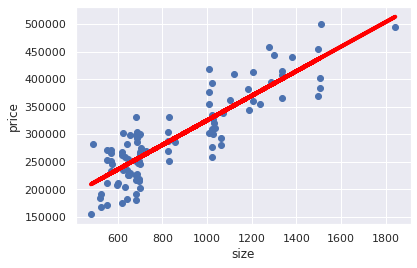

In [32]:
plt.scatter(x,y)
yh = reg.coef_*x_matrix+reg.intercept_
plt.plot(x, yh, lw=4, c='red', label='regression')
plt.xlabel('size')
plt.ylabel('price')
plt.show()